In [1]:
%pip install pandas
%pip install numpy


Note: you may need to restart the kernel to use updated packages.


DATA CLEANING AND DATA PREPROSSING

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff  

In [3]:
st=pd.read_csv("D:\Projects\FAAN_ML_Regression\FAANG - FAANG.csv")

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\abina\AppData\Local\Temp\ipykernel_21448\49878635.py:1: SyntaxWarning: invalid escape sequence '\P'
  st=pd.read_csv("D:\Projects\FAAN_ML_Regression\FAANG - FAANG.csv")


In [4]:
st.head()

Company Ticker        Date      Open      High       Low     Close  \
0   Apple   AAPL  03-01-2005  1.156786  1.162679  1.117857  1.130179   
1   Apple   AAPL  04-01-2005  1.139107  1.169107  1.124464  1.141786   
2   Apple   AAPL  05-01-2005  1.151071  1.165179  1.143750  1.151786   
3   Apple   AAPL  06-01-2005  1.154821  1.159107  1.130893  1.152679   
4   Apple   AAPL  07-01-2005  1.160714  1.243393  1.156250  1.236607   

   Adj Close      Volume    Market Cap  ...  Price to Book Ratio  \
0   0.954409   691992000  3.580000e+12  ...             53.66043   
1   0.964210  1096810400  3.580000e+12  ...             53.66043   
2   0.972655   680433600  3.580000e+12  ...             53.66043   
3   0.973409   705555200  3.580000e+12  ...             53.66043   
4   1.044284  2227450400  3.580000e+12  ...             53.66043   

   Enterprise Value    Total Debt  Total Assets  Total Equity  Beta (5Y)  \
0      3.570000e+12  1.010000e+11           NaN           NaN      1.239   
1      3.570000e+12  1.010000e+11           NaN           NaN      1.239   
2      3.570000e+12  1.010000e+11           NaN           NaN      1.239   
3      3.570000e+12  1.010000e+11           NaN           NaN      1.239   
4      3.570000e+12  1.010000e+11           NaN           NaN      1.239   

   Annual Dividend Rate  Trailing Twelve Months (TTM) Revenue  \
0                   1.0                                   NaN   
1                   1.0                                   NaN   
2                   1.0                                   NaN   
3                   1.0                                   NaN   
4                   1.0                                   NaN   

   Trailing Twelve Months (TTM) EBITDA  Trailing Twelve Months (TTM) Earnings  
0                                  NaN                                    NaN  
1                                  NaN                                    NaN  
2                                  NaN                                    NaN  
3                                  NaN                                    NaN  
4                                  NaN                                    NaN  

[5 rows x 41 columns]

In [5]:
st.shape

(23055, 41)

In [6]:
st.dtypes

Company                                   object
Ticker                                    object
Date                                      object
Open                                     float64
High                                     float64
Low                                      float64
Close                                    float64
Adj Close                                float64
Volume                                     int64
Market Cap                               float64
PE Ratio                                 float64
Beta                                     float64
EPS                                      float64
Forward PE                               float64
Revenue                                  float64
Gross Profit                             float64
Operating Income                         float64
Net Income                               float64
Debt to Equity                           float64
Return on Equity (ROE)                   float64
Current Ratio       

In [7]:
st.isnull().sum()

Company                                      0
Ticker                                       0
Date                                         0
Open                                         0
High                                         0
Low                                          0
Close                                        0
Adj Close                                    0
Volume                                       0
Market Cap                                   0
PE Ratio                                     0
Beta                                      4982
EPS                                          0
Forward PE                                   0
Revenue                                  23055
Gross Profit                             23055
Operating Income                         23055
Net Income                                   0
Debt to Equity                               0
Return on Equity (ROE)                       0
Current Ratio                                0
Dividends Pai

In [8]:
st.describe()

Open          High           Low         Close     Adj Close  \
count  23055.000000  23055.000000  23055.000000  23055.000000  23055.000000   
mean      93.647661     94.863101     92.420934     93.672274     93.206572   
std      126.060231    127.749769    124.330704    126.069016    126.123574   
min        1.139107      1.159107      1.117857      1.130179      0.954409   
25%       11.728979     11.864486     11.587829     11.720929     11.366614   
50%       38.584999     38.983002     38.297501     38.598499     38.050781   
75%      134.849998    136.550003    133.449997    134.970001    134.173950   
max      734.900024    736.000000    722.500000    730.289978    730.289978   

             Volume    Market Cap      PE Ratio          Beta          EPS  \
count  2.305500e+04  2.305500e+04  23055.000000  18073.000000  23055.00000   
mean   1.384445e+08  1.912023e+12     35.912447      1.154244     10.29935   
std    2.430001e+08  1.084576e+12      8.300362      0.079878      6.07117   
min    1.144000e+06  3.250000e+11     23.492826      1.038000      4.18000   
25%    2.131500e+07  1.470000e+12     29.612986      1.038000      6.57000   
50%    5.576380e+07  2.000000e+12     35.789955      1.147000      6.97000   
75%    1.302896e+08  2.020000e+12     42.824500      1.239000     17.67000   
max    3.372970e+09  3.580000e+12     45.496414      1.239000     19.56000   

       ...  Price to Book Ratio  Enterprise Value    Total Debt  Total Assets  \
count  ...         23055.000000      2.305500e+04  2.305500e+04           0.0   
mean   ...            19.221725      1.889801e+12  7.078233e+10           NaN   
std    ...            18.271000      1.090111e+12  5.493995e+10           NaN   
min    ...             6.708661      3.010000e+11  1.598133e+10           NaN   
25%    ...             8.437223      1.440000e+12  2.871900e+10           NaN   
50%    ...             9.359326      1.930000e+12  3.799100e+10           NaN   
75%    ...            14.262457      2.040000e+12  1.010000e+11           NaN   
max    ...            53.660430      3.570000e+12  1.580000e+11           NaN   

       Total Equity     Beta (5Y)  Annual Dividend Rate  \
count           0.0  18073.000000          13091.000000   
mean            NaN      1.154244              1.162585   
std             NaN      0.079878              0.476994   
min             NaN      1.038000              0.800000   
25%             NaN      1.038000              0.800000   
50%             NaN      1.147000              1.000000   
75%             NaN      1.239000              1.000000   
max             NaN      1.239000              2.000000   

       Trailing Twelve Months (TTM) Revenue  \
count                                   0.0   
mean                                    NaN   
std                                     NaN   
min                                     NaN   
25%                                     NaN   
50%                                     NaN   
75%                                     NaN   
max                                     NaN   

       Trailing Twelve Months (TTM) EBITDA  \
count                                  0.0   
mean                                   NaN   
std                                    NaN   
min                                    NaN   
25%                                    NaN   
50%                                    NaN   
75%                                    NaN   
max                                    NaN   

       Trailing Twelve Months (TTM) Earnings  
count                                    0.0  
mean                                     NaN  
std                                      NaN  
min                                      NaN  
25%                                      NaN  
50%                                      NaN  
75%                                      NaN  
max                                      NaN  

[8 rows x 37 columns]

Standardize Data Formats:


In [9]:

# Convert the dates from DD-MM-YYYY to datetime format
st['Date'] = pd.to_datetime(st['Date'], format='%d-%m-%Y')

In [10]:
# converting the numerical columns to float and integer
numerical_cols = st.select_dtypes(include=['float64', 'int64']).columns

In [11]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23055 entries, 0 to 23054
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Company                                23055 non-null  object        
 1   Ticker                                 23055 non-null  object        
 2   Date                                   23055 non-null  datetime64[ns]
 3   Open                                   23055 non-null  float64       
 4   High                                   23055 non-null  float64       
 5   Low                                    23055 non-null  float64       
 6   Close                                  23055 non-null  float64       
 7   Adj Close                              23055 non-null  float64       
 8   Volume                                 23055 non-null  int64         
 9   Market Cap                             23055 non-null  float6

Handle Missing Values:

In [12]:
# Fill missing values with median
st[numerical_cols] = st[numerical_cols].fillna(st[numerical_cols].median())

In [13]:
st.isnull().sum()

Company                                      0
Ticker                                       0
Date                                         0
Open                                         0
High                                         0
Low                                          0
Close                                        0
Adj Close                                    0
Volume                                       0
Market Cap                                   0
PE Ratio                                     0
Beta                                         0
EPS                                          0
Forward PE                                   0
Revenue                                  23055
Gross Profit                             23055
Operating Income                         23055
Net Income                                   0
Debt to Equity                               0
Return on Equity (ROE)                       0
Current Ratio                                0
Dividends Pai

In [14]:
# drop the column with null value percentage was above 60 percent 
Revenue_null_percentage = st['Revenue'].isnull().mean() * 100
Gross_Profit_null_percentage =st['Gross Profit'].isnull().mean() * 100
Operating_Income_null_percentage = st['Operating Income'].isnull().mean() * 100
Cash_Ratio_null_percentage = st['Cash Ratio'].isnull().mean() * 100
Total_Assets_null_percentage = st['Total Assets'].isnull().mean() * 100                         
Total_Equity_null_percentage = st['Total Equity'].isnull().mean() * 100                           
Trailing_Twelve_Months_Revenue_null_percentage = st['Trailing Twelve Months (TTM) Revenue'].isnull().mean() * 100   
Trailing_Twelve_Months_EBITDA_null_percentage = st['Trailing Twelve Months (TTM) EBITDA'].isnull().mean() * 100
Trailing_Twelve_Months_Earnings_null_percentage = st['Trailing Twelve Months (TTM) Earnings'].isnull().mean() * 100

print(f"Percentage of null values in 'Revenue': {Revenue_null_percentage:.2f}%")
print(f"Percentage of null values in 'Gross Profit': {Gross_Profit_null_percentage:.2f}%")
print(f"Percentage of null values in 'Operating Income': {Operating_Income_null_percentage:.2f}%")
print(f"Percentage of null values in 'Cash Ratio': {Cash_Ratio_null_percentage:.2f}%")
print(f"Percentage of null values in 'Total Assets': {Total_Assets_null_percentage:.2f}%")
print(f"Percentage of null values in 'Total Equity': {Total_Equity_null_percentage:.2f}%")
print(f"Percentage of null values in 'Trailing Twelve Months (TTM) Revenue': {Trailing_Twelve_Months_Revenue_null_percentage:.2f}%")
print(f"Percentage of null values in 'Trailing Twelve Months (TTM) EBITDA': {Trailing_Twelve_Months_EBITDA_null_percentage:.2f}%")
print(f"Percentage of null values in 'Trailing Twelve Months (TTM) Earnings': {Trailing_Twelve_Months_Earnings_null_percentage:.2f}%")


Percentage of null values in 'Revenue': 100.00%
Percentage of null values in 'Gross Profit': 100.00%
Percentage of null values in 'Operating Income': 100.00%
Percentage of null values in 'Cash Ratio': 100.00%
Percentage of null values in 'Total Assets': 100.00%
Percentage of null values in 'Total Equity': 100.00%
Percentage of null values in 'Trailing Twelve Months (TTM) Revenue': 100.00%
Percentage of null values in 'Trailing Twelve Months (TTM) EBITDA': 100.00%
Percentage of null values in 'Trailing Twelve Months (TTM) Earnings': 100.00%


In [15]:
# droping the columns
dfnew = st.drop(columns=['Revenue', 'Gross Profit', 'Operating Income', 'Cash Ratio', 'Total Assets', 'Total Equity', 'Trailing Twelve Months (TTM) Revenue', 'Trailing Twelve Months (TTM) EBITDA', 'Trailing Twelve Months (TTM) Earnings'])

In [16]:
dfnew.isna().sum()

Company                     0
Ticker                      0
Date                        0
Open                        0
High                        0
Low                         0
Close                       0
Adj Close                   0
Volume                      0
Market Cap                  0
PE Ratio                    0
Beta                        0
EPS                         0
Forward PE                  0
Net Income                  0
Debt to Equity              0
Return on Equity (ROE)      0
Current Ratio               0
Dividends Paid              0
Dividend Yield              0
Quarterly Revenue Growth    0
Analyst Recommendation      0
Target Price                0
Free Cash Flow              0
Operating Margin            0
Profit Margin               0
Quick Ratio                 0
Price to Book Ratio         0
Enterprise Value            0
Total Debt                  0
Beta (5Y)                   0
Annual Dividend Rate        0
dtype: int64

In [17]:
# Check unique values in the column
unique_values = dfnew['Analyst Recommendation'].unique()

# Count of unique values
num_unique = len(unique_values)

print("Unique values:", unique_values)
print("Number of unique values:", num_unique)

Unique values: ['buy']
Number of unique values: 1


In [18]:
# Drop the "Analyst Recommendation" column
faang_new_data = dfnew.drop(columns=['Analyst Recommendation'])

# Verify the change
faang_new_data.head()

Company Ticker       Date      Open      High       Low     Close  \
0   Apple   AAPL 2005-01-03  1.156786  1.162679  1.117857  1.130179   
1   Apple   AAPL 2005-01-04  1.139107  1.169107  1.124464  1.141786   
2   Apple   AAPL 2005-01-05  1.151071  1.165179  1.143750  1.151786   
3   Apple   AAPL 2005-01-06  1.154821  1.159107  1.130893  1.152679   
4   Apple   AAPL 2005-01-07  1.160714  1.243393  1.156250  1.236607   

   Adj Close      Volume    Market Cap  ...  Target Price  Free Cash Flow  \
0   0.954409   691992000  3.580000e+12  ...        240.78     86158123008   
1   0.964210  1096810400  3.580000e+12  ...        240.78     86158123008   
2   0.972655   680433600  3.580000e+12  ...        240.78     86158123008   
3   0.973409   705555200  3.580000e+12  ...        240.78     86158123008   
4   1.044284  2227450400  3.580000e+12  ...        240.78     86158123008   

   Operating Margin  Profit Margin  Quick Ratio  Price to Book Ratio  \
0           0.29556        0.26441        0.798             53.66043   
1           0.29556        0.26441        0.798             53.66043   
2           0.29556        0.26441        0.798             53.66043   
3           0.29556        0.26441        0.798             53.66043   
4           0.29556        0.26441        0.798             53.66043   

   Enterprise Value    Total Debt  Beta (5Y)  Annual Dividend Rate  
0      3.570000e+12  1.010000e+11      1.239                   1.0  
1      3.570000e+12  1.010000e+11      1.239                   1.0  
2      3.570000e+12  1.010000e+11      1.239                   1.0  
3      3.570000e+12  1.010000e+11      1.239                   1.0  
4      3.570000e+12  1.010000e+11      1.239                   1.0  

[5 rows x 31 columns]

In [21]:
faang_new_data.to_csv("FAAN_new.csv",index=False)


Remove Outliers: using IQR (Interquartile Range)

In [22]:
# Define the columns for outlier clipping
price_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close']
volume_column = 'Volume'

# Function to clip outliers using IQR
def clip_outliers_iqr(df_data, column):
    Q1 = df_data[column].quantile(0.25)  # First quartile
    Q3 = df_data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Clip the values to the lower and upper bounds
    df_data[column] = df_data[column].clip(lower=lower_bound, upper=upper_bound)

# Apply IQR-based clipping to price and volume columns
for column in price_columns + [volume_column]:
    if column in faang_new_data.columns:
        clip_outliers_iqr(faang_new_data, column)
    else:
        print(f"Warning: Column '{column}' not found in the dataset.")

# Check the shape of the dataset after IQR-based clipping
print(faang_new_data.shape)

(23055, 31)


In [23]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Assuming 'faang_new_data' is your DataFrame
# Define the columns for Z-score filtering (e.g., price and volume columns)
columns_to_check = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Calculate Z-scores for the relevant columns
z_scores = faang_new_data[columns_to_check].apply(zscore)

# Filter the rows where the absolute value of Z-score is greater than 3
df_filtered = faang_new_data[(np.abs(z_scores) <= 3).all(axis=1)]

# Check the shape of the filtered dataset
print(f"Original shape: {faang_new_data.shape}")
print(f"Filtered shape: {df_filtered.shape}")

# Optionally, check the summary statistics to verify outliers have been removed
print(df_filtered[columns_to_check].describe())

Original shape: (23055, 31)
Filtered shape: (23055, 31)
               Open          High           Low         Close     Adj Close  \
count  23055.000000  23055.000000  23055.000000  23055.000000  23055.000000   
mean      83.776867     84.842436     82.767728     83.823467     83.266273   
std       95.745328     97.025752     94.613871     95.823935     95.634819   
min        1.139107      1.159107      1.117857      1.130179      0.954409   
25%       11.728979     11.864486     11.587829     11.720929     11.366614   
50%       38.584999     38.983002     38.297501     38.598499     38.050781   
75%      134.849998    136.550003    133.449997    134.970001    134.173950   
max      319.531527    323.578279    316.243249    319.843610    318.384955   

             Volume  
count  2.305500e+04  
mean   9.345434e+07  
std    9.471904e+07  
min    1.144000e+06  
25%    2.131500e+07  
50%    5.576380e+07  
75%    1.302896e+08  
max    2.937515e+08  


In [24]:
print(faang_new_data['Company'].unique())  # Check unique values in the 'Company' column
print(faang_new_data['Ticker'].unique())   # Check unique values in the 'Ticker' column

['Apple' 'Facebook' 'Google' 'Amazon' 'Netflix']
['AAPL' 'META' 'GOOGL' 'AMZN' 'NFLX']


In [25]:
# One-Hot Encoding for 'Company' and 'Ticker'
df_encoded = pd.get_dummies(faang_new_data, columns=['Company', 'Ticker'], prefix=['Stock', 'Ticker'])

# Check the shape of the dataset after one-hot encoding
print(df_encoded.shape)


(23055, 39)


In [26]:
df_encoded.head()

Date      Open      High       Low     Close  Adj Close     Volume  \
0 2005-01-03  1.156786  1.162679  1.117857  1.130179   0.954409  293751500   
1 2005-01-04  1.139107  1.169107  1.124464  1.141786   0.964210  293751500   
2 2005-01-05  1.151071  1.165179  1.143750  1.151786   0.972655  293751500   
3 2005-01-06  1.154821  1.159107  1.130893  1.152679   0.973409  293751500   
4 2005-01-07  1.160714  1.243393  1.156250  1.236607   1.044284  293751500   

     Market Cap   PE Ratio   Beta  ...  Stock_Amazon  Stock_Apple  \
0  3.580000e+12  35.789955  1.239  ...         False         True   
1  3.580000e+12  35.789955  1.239  ...         False         True   
2  3.580000e+12  35.789955  1.239  ...         False         True   
3  3.580000e+12  35.789955  1.239  ...         False         True   
4  3.580000e+12  35.789955  1.239  ...         False         True   

   Stock_Facebook  Stock_Google  Stock_Netflix  Ticker_AAPL  Ticker_AMZN  \
0           False         False          False         True        False   
1           False         False          False         True        False   
2           False         False          False         True        False   
3           False         False          False         True        False   
4           False         False          False         True        False   

   Ticker_GOOGL  Ticker_META  Ticker_NFLX  
0         False        False        False  
1         False        False        False  
2         False        False        False  
3         False        False        False  
4         False        False        False  

[5 rows x 39 columns]

In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder




# Extract year, month, and day_of_week
df_encoded['year'] = df_encoded['Date'].dt.year
df_encoded['month'] = df_encoded['Date'].dt.month
df_encoded['day_of_week'] = df_encoded['Date'].dt.day_name()

# Label Encoding for 'year' column
label_encoder = LabelEncoder()
df_encoded['year_encoded'] = label_encoder.fit_transform(df_encoded['year'])

# One-Hot Encoding for the 'month' and 'day_of_week' columns
df_encode = pd.get_dummies(df_encoded, columns=['month', 'day_of_week'])
# Display the final encoded DataFrame
print(df_encode)

            Date        Open        High         Low       Close   Adj Close  \
0     2005-01-03    1.156786    1.162679    1.117857    1.130179    0.954409   
1     2005-01-04    1.139107    1.169107    1.124464    1.141786    0.964210   
2     2005-01-05    1.151071    1.165179    1.143750    1.151786    0.972655   
3     2005-01-06    1.154821    1.159107    1.130893    1.152679    0.973409   
4     2005-01-07    1.160714    1.243393    1.156250    1.236607    1.044284   
...          ...         ...         ...         ...         ...         ...   
23050 2024-10-11  319.531527  323.578279  316.243249  319.843610  318.384955   
23051 2024-10-14  319.531527  323.578279  316.243249  319.843610  318.384955   
23052 2024-10-15  319.531527  323.578279  316.243249  319.843610  318.384955   
23053 2024-10-16  319.531527  323.578279  316.243249  319.843610  318.384955   
23054 2024-10-17  319.531527  323.578279  316.243249  319.843610  318.384955   

          Volume    Market Cap   PE Rat

In [28]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23055 entries, 0 to 23054
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      23055 non-null  datetime64[ns]
 1   Open                      23055 non-null  float64       
 2   High                      23055 non-null  float64       
 3   Low                       23055 non-null  float64       
 4   Close                     23055 non-null  float64       
 5   Adj Close                 23055 non-null  float64       
 6   Volume                    23055 non-null  int64         
 7   Market Cap                23055 non-null  float64       
 8   PE Ratio                  23055 non-null  float64       
 9   Beta                      23055 non-null  float64       
 10  EPS                       23055 non-null  float64       
 11  Forward PE                23055 non-null  float64       
 12  Net Income        

In [29]:
df_code= df_encode.drop(columns=['Date', 'year'])

In [30]:
df_code.shape

(23055, 56)

2. Exploratory Data Analysis (EDA)
Descriptive Statistics:

In [31]:
import pandas as pd


# Compute descriptive statistics
descriptive_stats = df_code.describe(include=[float, int]).T
descriptive_stats['Median'] = df_code.median(numeric_only=True)
descriptive_stats['Mode'] = df_code.mode().iloc[0]

# Display summary statistics
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
                            count          mean           std           min  \
Open                      23055.0  8.377687e+01  9.574533e+01  1.139107e+00   
High                      23055.0  8.484244e+01  9.702575e+01  1.159107e+00   
Low                       23055.0  8.276773e+01  9.461387e+01  1.117857e+00   
Close                     23055.0  8.382347e+01  9.582393e+01  1.130179e+00   
Adj Close                 23055.0  8.326627e+01  9.563482e+01  9.544085e-01   
Volume                    23055.0  9.345434e+07  9.471904e+07  1.144000e+06   
Market Cap                23055.0  1.912023e+12  1.084576e+12  3.250000e+11   
PE Ratio                  23055.0  3.591245e+01  8.300362e+00  2.349283e+01   
Beta                      23055.0  1.152678e+00  7.078544e-02  1.038000e+00   
EPS                       23055.0  1.029935e+01  6.071170e+00  4.180000e+00   
Forward PE                23055.0  2.823359e+01  5.725820e+00  1.884292e+01   
Net Income                23

Data Visualization:


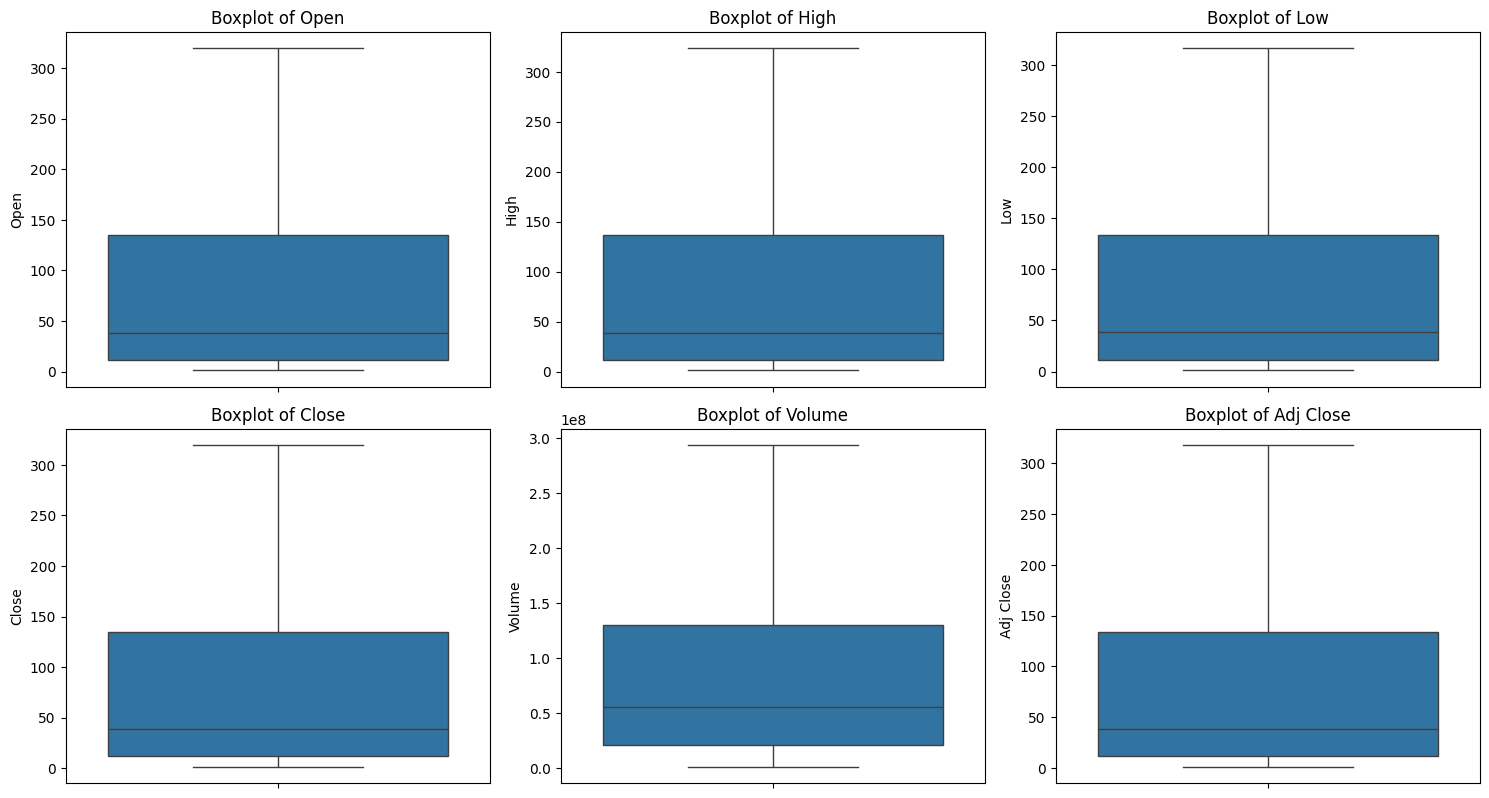

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to visualize
columns_to_plot = ['Open', 'High', 'Low', 'Close', 'Volume','Adj Close']

# Create subplots
plt.figure(figsize=(15, 12))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  # Adjusted to 3 rows and 3 columns to accommodate all plots
    sns.boxplot(y=column, data= df_code)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

 Box Plot: Detect Outliers in Price and Volume

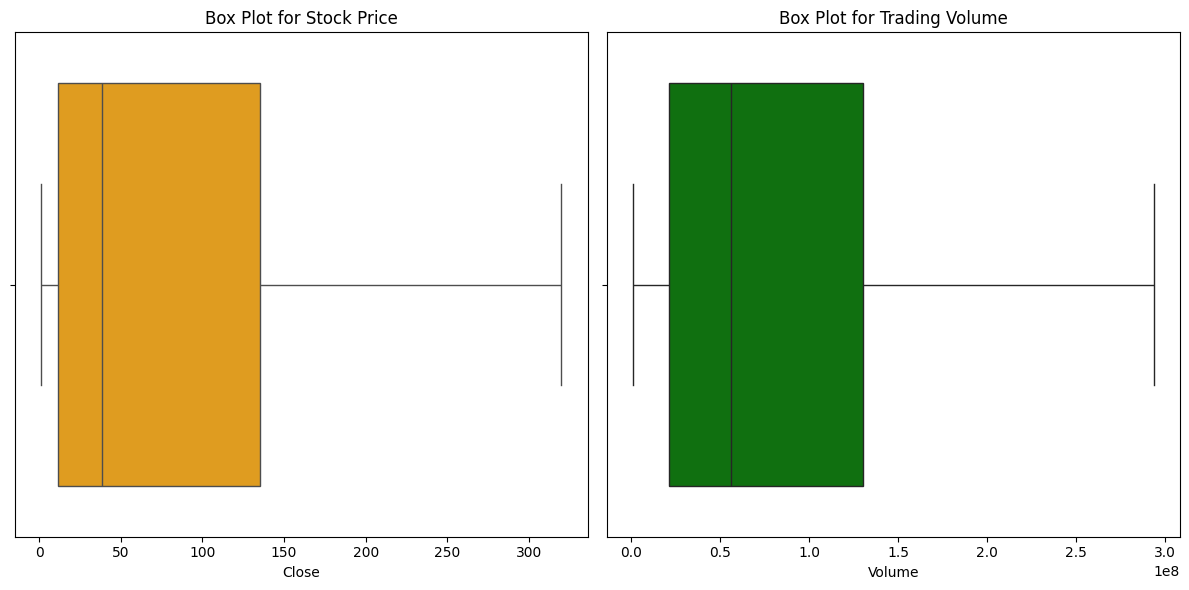

In [33]:
plt.figure(figsize=(12,6))

# Box plot for 'Close' price
plt.subplot(1, 2, 1)
sns.boxplot(x=df_code['Close'], color='orange')
plt.title('Box Plot for Stock Price')

# Box plot for 'Volume'
plt.subplot(1, 2, 2)
sns.boxplot(x=df_code['Volume'], color='green')
plt.title('Box Plot for Trading Volume')

plt.tight_layout()
plt.show()

Scatter Plot: Visualize Relationships Between Stock Prices and Volume

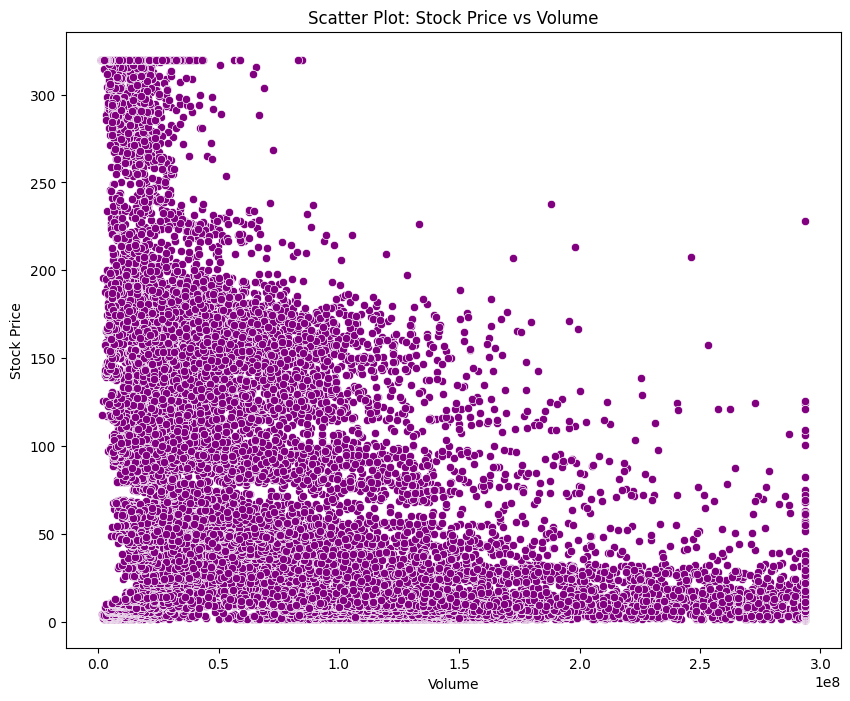

In [34]:
plt.figure(figsize=(10,8))
sns.scatterplot(x= df_code['Volume'], y= df_code['Close'], color='purple')
plt.title('Scatter Plot: Stock Price vs Volume')
plt.xlabel('Volume')
plt.ylabel('Stock Price')
plt.show()

Correlation Heatmap: Identify Relationships Between Features

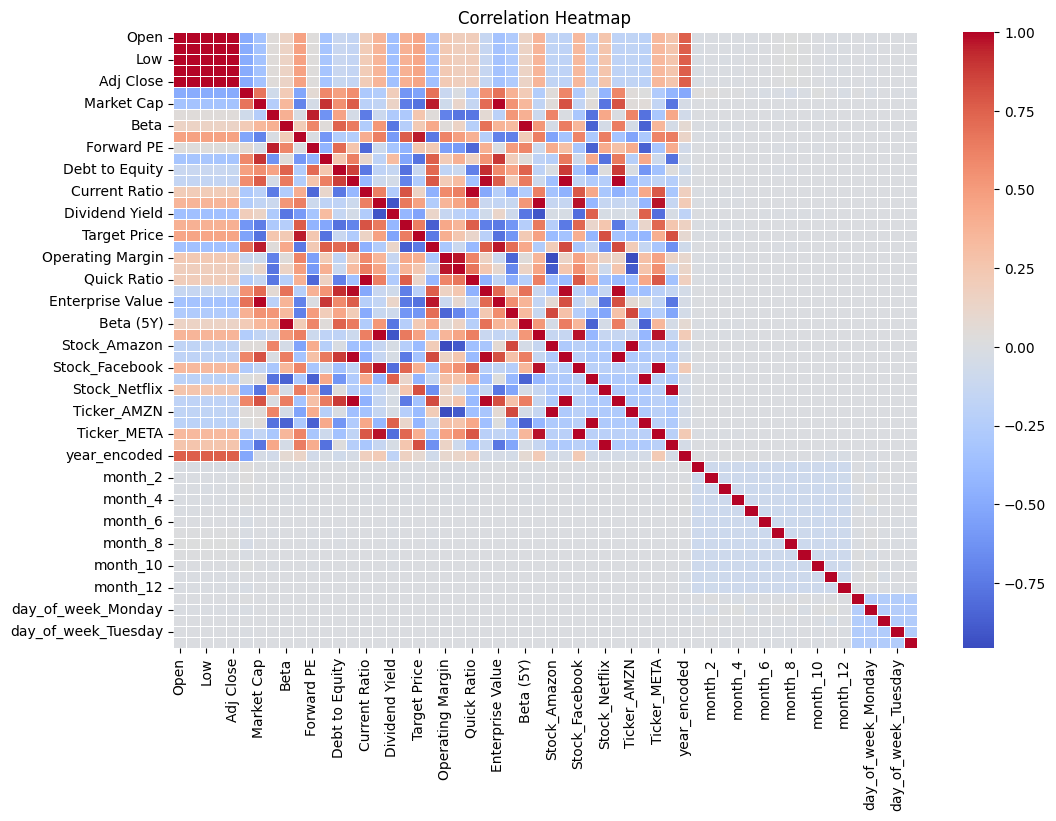

In [35]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df_code.corr()

# Plotting the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,  cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [36]:
# Scatter plot for Open vs. Volume
fig_open = px.scatter(df_code, x='Volume', y='Open', title='Open Price vs. Volume', labels={'Volume': 'Volume', 'Open': 'Open Price'}, opacity=0.7)
fig_open.show()

# Scatter plot for High vs. Volume
fig_high = px.scatter(df_code, x='Volume', y='High', title='High Price vs. Volume', labels={'Volume': 'Volume', 'High': 'High Price'}, opacity=0.7)
fig_high.show()

# Scatter plot for Low vs. Volume
fig_low = px.scatter(df_code, x='Volume', y='Low', title='Low Price vs. Volume', labels={'Volume': 'Volume', 'Low': 'Low Price'}, opacity=0.7)
fig_low.show()

# Scatter plot for Close vs. Volume
fig_close = px.scatter(df_code, x='Volume', y='Close', title='Close Price vs. Volume', labels={'Volume': 'Volume', 'Close': 'Close Price'}, opacity=0.7)
fig_close.show()

In [37]:
# Scatter plot for Close vs. Volume
fig_close_volume = px.scatter(df_code, x='Volume', y='Close', title='Close Price vs. Volume', labels={'Volume': 'Volume', 'Close': 'Close Price'}, opacity=0.7)
fig_close_volume.show()

# Scatter plot for Close vs. Open
fig_close_open = px.scatter(df_code, x='Open', y='Close', title='Close Price vs. Open Price', labels={'Open': 'Open Price', 'Close': 'Close Price'}, opacity=0.7)
fig_close_open.show()

# Scatter plot for Close vs. High
fig_close_high = px.scatter(df_code, x='High', y='Close', title='Close Price vs. High Price', labels={'High': 'High Price', 'Close': 'Close Price'}, opacity=0.7)
fig_close_high.show()

# Scatter plot for Close vs. Low
fig_close_low = px.scatter(df_code, x='Low', y='Close', title='Close Price vs. Low Price', labels={'Low': 'Low Price', 'Close': 'Close Price'}, opacity=0.7)
fig_close_low.show()


Distribution of different Stocks


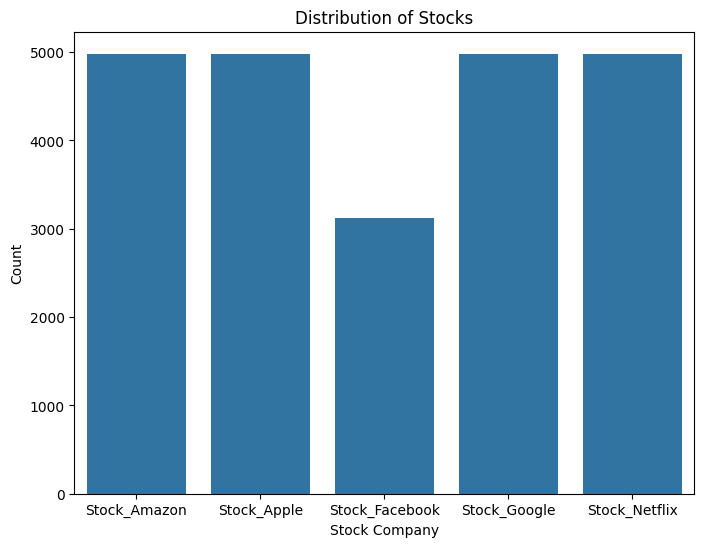

In [38]:
# Distribution of different tickers
Companies = ['Stock_Amazon', 'Stock_Apple', 'Stock_Facebook', 'Stock_Google','Stock_Netflix']
Company_counts = df_code[Companies].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=Company_counts.index, y=Company_counts.values)
plt.title('Distribution of Stocks')
plt.xlabel('Stock Company')
plt.ylabel('Count')
plt.show()

Feature Selection:


Open                        0.999845
High                        0.999924
Low                         0.999921
Close                       1.000000
Adj Close                   0.999963
Volume                     -0.489813
Market Cap                 -0.332149
PE Ratio                    0.043920
Beta                        0.145674
EPS                         0.470585
Forward PE                  0.031706
Net Income                 -0.314775
Debt to Equity             -0.122010
Return on Equity (ROE)     -0.146895
Current Ratio               0.206454
Dividends Paid              0.362889
Dividend Yield             -0.353108
Quarterly Revenue Growth    0.384677
Target Price                0.449846
Free Cash Flow             -0.346899
Operating Margin            0.228591
Profit Margin               0.185695
Quick Ratio                 0.195271
Price to Book Ratio        -0.132806
Enterprise Value           -0.331193
Total Debt                 -0.266405
Beta (5Y)                   0.145674
A

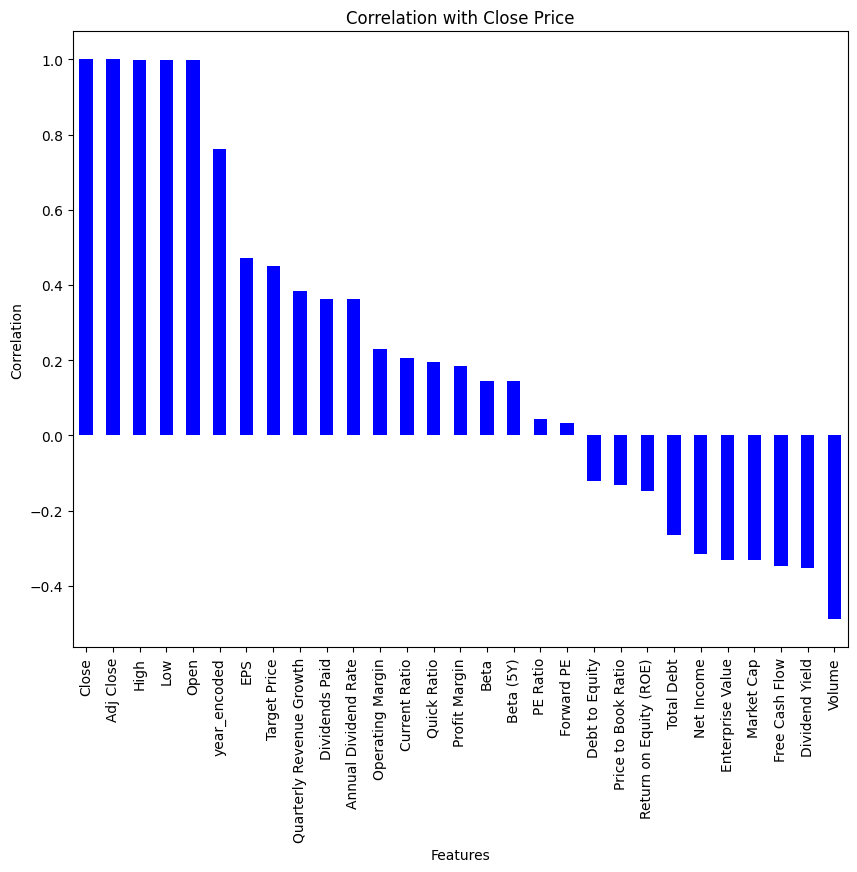

In [39]:
# Calculate the correlation between continuous features and 'Close'
continuous_features = df_code.select_dtypes(include=['float64', 'int64']).columns
correlations = df_code[continuous_features].corrwith(df_code['Close'])

# Display the correlations with 'Close'
print(correlations)

# Plotting the correlation with 'Close'
plt.figure(figsize=(10, 8))
correlations.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Correlation with Close Price')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

ANOVA Test for boolean Categorical Variables:


In [40]:
# Check the data types of each column
categorical_columns = df_code.select_dtypes(include=['object', 'bool']).columns

# Display the categorical columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Stock_Amazon', 'Stock_Apple', 'Stock_Facebook', 'Stock_Google',
       'Stock_Netflix', 'Ticker_AAPL', 'Ticker_AMZN', 'Ticker_GOOGL',
       'Ticker_META', 'Ticker_NFLX', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday'],
      dtype='object')


In [41]:
from scipy import stats

# List of categorical columns to perform ANOVA
categorical_columns = ['Stock_Amazon', 'Stock_Apple', 'Stock_Facebook', 'Stock_Google','Stock_Netflix', 
                       'Ticker_AAPL','Ticker_AMZN', 'Ticker_GOOGL', 'Ticker_META', 'Ticker_NFLX']

# Perform ANOVA for each categorical column
for col in categorical_columns:
    # Check if the column contains only boolean values (True/False) 
    if df_code[col].dtype == 'bool':
        # Drop rows where 'Close' or the categorical column has missing values
        df_clean = df_code.dropna(subset=['Close', col])
        
        # Group data based on whether the column is True or False
        groups = [df_clean[df_clean[col] == True]['Close'], df_clean[df_clean[col] == False]['Close']]
        
        # Perform ANOVA test
        f_statistic, p_value = stats.f_oneway(*groups)
        
        # Print the result for each column
        print(f'ANOVA Test for {col}: F-statistic = {f_statistic}, p-value = {p_value}')
        
        # If p-value < 0.05, it suggests the feature is significantly related to 'Close'
        if p_value < 0.05:
            print(f"The feature {col} is significantly related to 'Close'.\n")
        else:
            print(f"The feature {col} is NOT significantly related to 'Close'.\n")

ANOVA Test for Stock_Amazon: F-statistic = 688.8428244871384, p-value = 1.2576799982833683e-149
The feature Stock_Amazon is significantly related to 'Close'.

ANOVA Test for Stock_Apple: F-statistic = 750.751345065806, p-value = 1.1098520546637887e-162
The feature Stock_Apple is significantly related to 'Close'.

ANOVA Test for Stock_Facebook: F-statistic = 3064.1601771527176, p-value = 0.0
The feature Stock_Facebook is significantly related to 'Close'.

ANOVA Test for Stock_Google: F-statistic = 954.5896908085407, p-value = 2.0448533153986133e-205
The feature Stock_Google is significantly related to 'Close'.

ANOVA Test for Stock_Netflix: F-statistic = 1705.8279318127456, p-value = 0.0
The feature Stock_Netflix is significantly related to 'Close'.

ANOVA Test for Ticker_AAPL: F-statistic = 750.751345065806, p-value = 1.1098520546637887e-162
The feature Ticker_AAPL is significantly related to 'Close'.

ANOVA Test for Ticker_AMZN: F-statistic = 688.8428244871384, p-value = 1.25767999828

In [42]:
# List of columns to drop based on the features you want to exclude
columns_to_drop =[ 'Market Cap',
       'PE Ratio', 'Beta', 'EPS', 'Forward PE', 'Net Income', 'Debt to Equity',
       'Return on Equity (ROE)', 'Current Ratio', 'Dividends Paid',
       'Dividend Yield', 'Quarterly Revenue Growth', 'Target Price',
       'Free Cash Flow', 'Operating Margin', 'Profit Margin', 'Quick Ratio',
       'Price to Book Ratio', 'Enterprise Value', 'Total Debt', 'Beta (5Y)',
       'Annual Dividend Rate', 'Ticker_AAPL', 'Ticker_AMZN',
       'Ticker_GOOGL', 'Ticker_META', 'Ticker_NFLX', ]

# Drop the specified columns from the dataset
data_fnd = df_code.drop(columns=columns_to_drop)

# Verify the result
print(data_fnd.head())

       Open      High       Low     Close  Adj Close     Volume  Stock_Amazon  \
0  1.156786  1.162679  1.117857  1.130179   0.954409  293751500         False   
1  1.139107  1.169107  1.124464  1.141786   0.964210  293751500         False   
2  1.151071  1.165179  1.143750  1.151786   0.972655  293751500         False   
3  1.154821  1.159107  1.130893  1.152679   0.973409  293751500         False   
4  1.160714  1.243393  1.156250  1.236607   1.044284  293751500         False   

   Stock_Apple  Stock_Facebook  Stock_Google  ...  month_8  month_9  month_10  \
0         True           False         False  ...    False    False     False   
1         True           False         False  ...    False    False     False   
2         True           False         False  ...    False    False     False   
3         True           False         False  ...    False    False     False   
4         True           False         False  ...    False    False     False   

   month_11  month_12  day

In [43]:
data_fnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23055 entries, 0 to 23054
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   23055 non-null  float64
 1   High                   23055 non-null  float64
 2   Low                    23055 non-null  float64
 3   Close                  23055 non-null  float64
 4   Adj Close              23055 non-null  float64
 5   Volume                 23055 non-null  int64  
 6   Stock_Amazon           23055 non-null  bool   
 7   Stock_Apple            23055 non-null  bool   
 8   Stock_Facebook         23055 non-null  bool   
 9   Stock_Google           23055 non-null  bool   
 10  Stock_Netflix          23055 non-null  bool   
 11  year_encoded           23055 non-null  int64  
 12  month_1                23055 non-null  bool   
 13  month_2                23055 non-null  bool   
 14  month_3                23055 non-null  bool   
 15  mo

In [44]:
data_fnd.to_csv("FAANG_clean.csv",index=False)
